In [2]:
import pandas as pd
orders = pd.read_csv('C:/Users/hazel/Downloads/archive/olist_orders_dataset.csv') 
products = pd.read_csv("C:/Users/hazel/Downloads/archive/olist_products_dataset.csv")
customers = pd.read_csv("C:/Users/hazel/Downloads/archive/olist_customers_dataset.csv")
order_items= pd.read_csv("C:/Users/hazel/Downloads/archive/olist_order_items_dataset.csv")

In [3]:
print(orders)
print(products)
print(customers)
print(order_items)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

In [4]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])


In [5]:
orders.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
customers.drop_duplicates(inplace=True)


In [6]:

print(orders.isnull().sum())
print(products.isnull().sum())
print(customers.isnull().sum())

orders.dropna(subset=['order_approved_at', 'order_delivered_customer_date'], inplace=True)

products['product_category_name'].fillna('Unknown', inplace=True)


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [7]:

order_customer_data = orders.merge(customers, on='customer_id', how='left')

order_items_products = order_items.merge(products, on='product_id', how='left')

final_data = order_customer_data.merge(order_items_products,on='order_id', how='left')

final_data.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [8]:

final_data['total_sales'] = final_data['freight_value'] 

final_data['profit'] = final_data['total_sales'] * 0.2 

final_data[['order_id', 'total_sales', 'profit']].head()

,order_id,total_sales,profit
0,e481f51cbdc54678b7cc49136f2d6af7,8.72,1.744
1,53cdb2fc8bc7dce0b6741e2150273451,22.76,4.552
2,47770eb9100c2d0c44946d9cf07ec65d,19.22,3.844
3,949d5b44dbf5de918fe9c16f97b45f8a,27.20,5.440
4,ad21c59c0840e6cb83a9ceb5573f8159,8.72,1.744


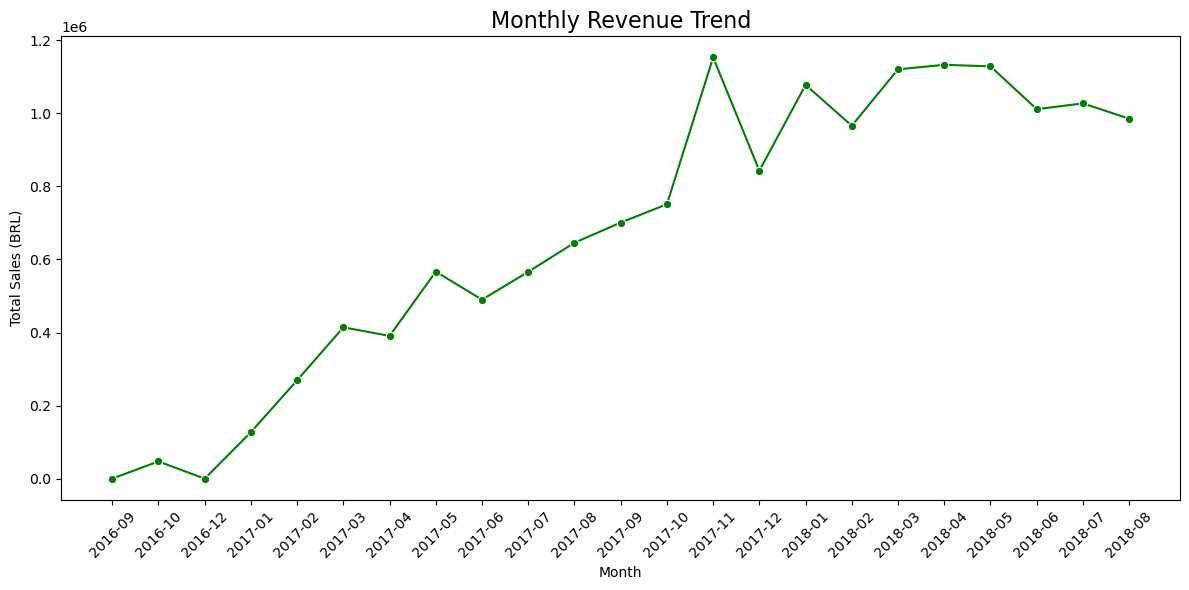

In [9]:

final_data['order_month'] = final_data['order_purchase_timestamp'].dt.to_period('M')

final_data['total_price'] = final_data['price'] + final_data['freight_value']

monthly_sales = final_data.groupby('order_month')['total_price'].sum().reset_index()

monthly_sales['order_month'] = monthly_sales['order_month'].astype(str)

# Step 5: Now Plot the Graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='order_month', y='total_price', marker='o', color='green')
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales (BRL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
import datetime as dt

snapshot_date = final_data['order_purchase_timestamp'].max() + dt.timedelta(days=1)

rfm = final_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days, 
    'order_id': 'nunique',
    'total_price': 'sum' 
}).reset_index()

rfm.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'total_price': 'Monetary'
}, inplace=True)

print(rfm.sort_values('Monetary', ascending=False).head())


                            customer_id  Recency  Frequency  Monetary
8291   1617b1357756262bfa56ab541c47bc16      334          1  13664.08
89261  ec5b2ba62e574342386871631fafd3fc       46          1   7274.88
75230  c6e2731c5b391845f6800c97401a43a9      563          1   6929.31
92296  f48d464a0baaea338cb25f816991ab1f       35          1   6922.21
24061  3fd6777bbce08a352fddd04e4a7cc8f6      462          1   6726.66


In [11]:
#SALES FORECASTING 

In [13]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
prophet_data= monthly_sales.rename(columns={'order_month':'ds','total_price':'y'})
prophet_data['ds']=pd.to_datetime(prophet_data['ds'])
prophet_data.head()

,ds,y
0,2016-09-01,143.46
1,2016-10-01,47195.15
2,2016-12-01,19.62
3,2017-01-01,127367.44
4,2017-02-01,269399.65


In [13]:
from prophet import Prophet

model = Prophet()

model.fit(prophet_data)


11:25:33 - cmdstanpy - INFO - Chain [1] start processing
11:25:34 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = model.make_future_dataframe(periods=6, freq='M')

In [15]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
24,2018-09-30,1.370841e+06,1.212694e+06,1.545842e+06
25,2018-10-31,1.425527e+06,1.258646e+06,1.596498e+06
26,2018-11-30,1.478449e+06,1.313598e+06,1.664766e+06
27,2018-12-31,1.533135e+06,1.363291e+06,1.700931e+06
28,2019-01-31,1.587821e+06,1.428508e+06,1.759410e+06


C:\Users\hazel\AppData\Local\Temp\ipykernel_21520\849813786.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
C:\Users\hazel\AppData\Local\Temp\ipykernel_21520\849813786.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


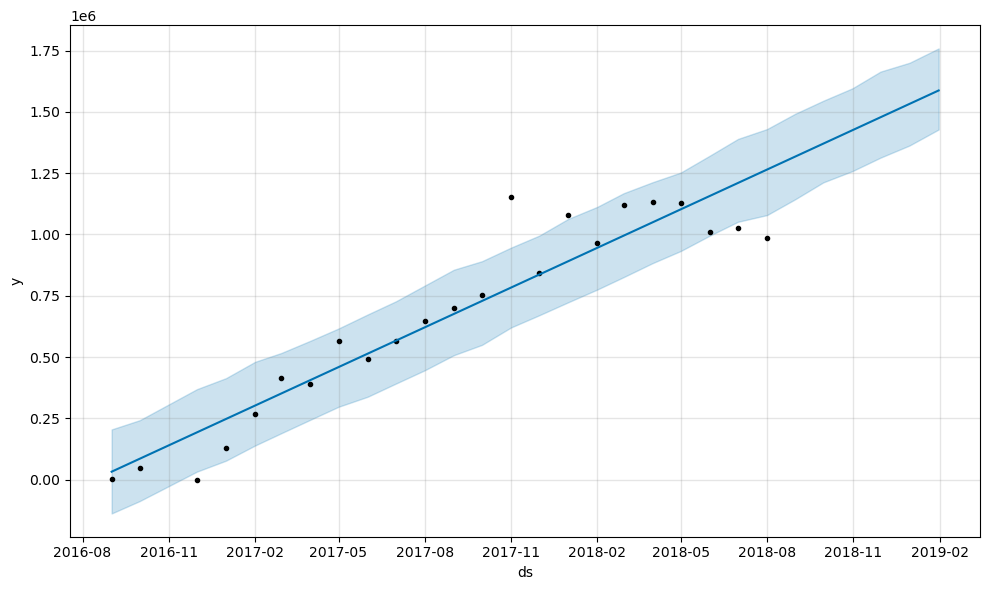

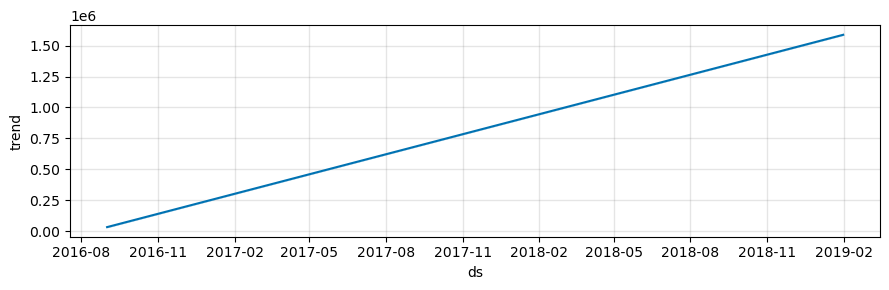

In [16]:
fig1 = model.plot(forecast)
fig1.show()

fig2 = model.plot_components(forecast)
fig2.show()


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('sales_forecast.csv', index=False)
final_data.to_csv('final_data.csv', index=False)

In [18]:
rfm.to_csv('rfm.csv', index=False)

In [19]:

rfm['R_Quartile'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Quartile'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Quartile'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])


rfm['RFM_Score'] = rfm['R_Quartile'].astype(str) + rfm['F_Quartile'].astype(str) + rfm['M_Quartile'].astype(str)

def rfm_segment(row):
    if row['R_Quartile'] == '4' and row['F_Quartile'] == '1' and row['M_Quartile'] == '1':
        return 'Champions'
    elif row['F_Quartile'] == '1':
        return 'Loyal Customers'
    elif row['R_Quartile'] == '1':
        return 'At Risk'
    else:
        return 'Others'

rfm['RFM_Segment'] = rfm.apply(rfm_segment, axis=1)

rfm.to_csv('rfm.csv', index=False)
